In [1]:
import Main
from Analyser import *

In [2]:
modelName = 'Ruler'

In [3]:
# Some PyABC magic to get our set of parameters
from pyabc import (ABCSMC, Distribution, RV, MultivariateNormalTransition)
import scipy as sp
import scipy.stats as st
import tempfile
import os
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def model(params):
    return Main.generate_and_analyse(modelName, params)

In [5]:
metrics = {
    'section_1_w': (0.2, 1.4),
    'section_1_decay' : (0.4,1.0),
    'rule_1_0': (0,1),
    'rule_1_1': (0,1),
    'rule_1_2': (0,1),
    'rule_1_3': (0,1),
    'rule_1_4': (0,1),
}

In [6]:
prior = Distribution(section_1_w         =RV("uniform", 0.2, 1.4),  
                     section_1_decay     =RV("uniform", 0.4, 1.0),
                     rule_1_0            =RV("uniform", 0, 1),
                     rule_1_1            =RV("uniform", 0, 1),
                     rule_1_2            =RV("uniform", 0, 1),
                     rule_1_3            =RV("uniform", 0, 1),
                     rule_1_4            =RV("uniform", 0, 1),
                    )

In [7]:
abc = ABCSMC(model, prior, distance)

In [8]:
db_path = ("sqlite:///" + os.path.join(tempfile.gettempdir(), "test.db"))

In [9]:
target = Main.generate_and_analyse("dereffye",{})

In [10]:
abc.new(db_path, target)

INFO:History:Start <ABCSMC(id=5, start_time=2019-04-16 00:31:46.370939, end_time=None)>
INFO:Epsilon:initial epsilon is 28.109054903882694


5

In [11]:
history = abc.run(minimum_epsilon=0.1, max_nr_populations=10)

INFO:ABC:t:0 eps:28.109054903882694
INFO:ABC:t:1 eps:16.84221744121187
INFO:ABC:t:2 eps:11.707176029697363
INFO:ABC:t:3 eps:9.398778869911364
INFO:ABC:t:4 eps:7.948115033972707
INFO:ABC:t:5 eps:6.638466587576879
INFO:ABC:t:6 eps:5.666906988030896
INFO:ABC:t:7 eps:4.674011072229606
INFO:ABC:t:8 eps:4.388561892532408
INFO:ABC:t:9 eps:3.9827822215239883
INFO:History:Done <ABCSMC(id=5, start_time=2019-04-16 00:31:46.370939, end_time=2019-04-16 01:04:07.099464)>


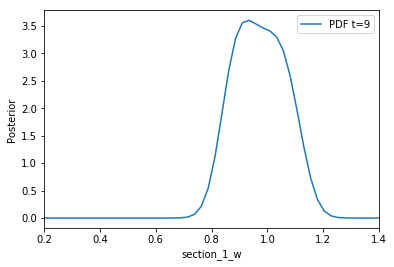

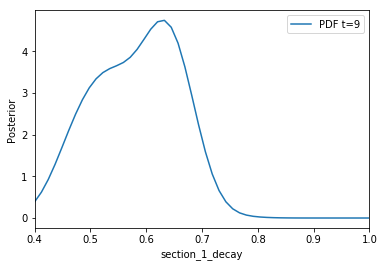

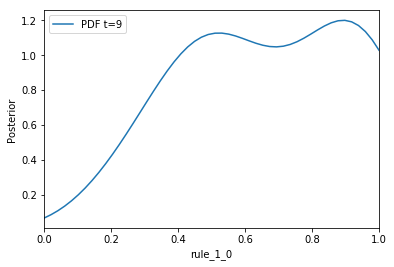

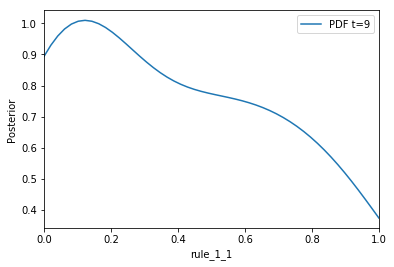

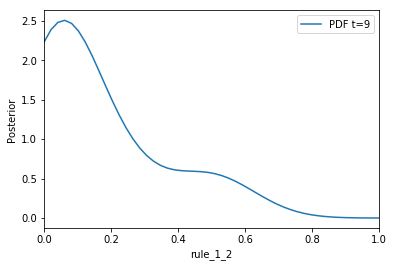

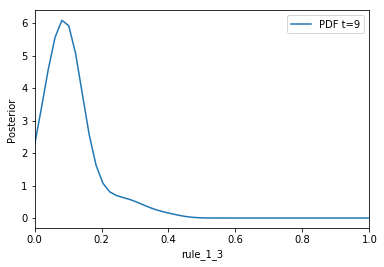

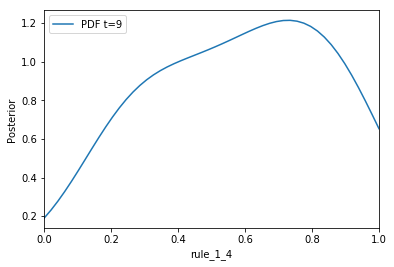

In [12]:
# Visualise results
from pyabc.visualization import plot_kde_1d
for (k,v) in metrics.items():
    fig, ax = plt.subplots()
    for t in range(history.max_t, history.max_t+1):
        df, w = history.get_distribution(m=0, t=t)
        plot_kde_1d(df, w,
                    xmin=v[0], xmax=v[1],
                    x=k, ax=ax,
                    label="PDF t={}".format(t))
    ax.legend();